In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('Advertising.csv')

In [2]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


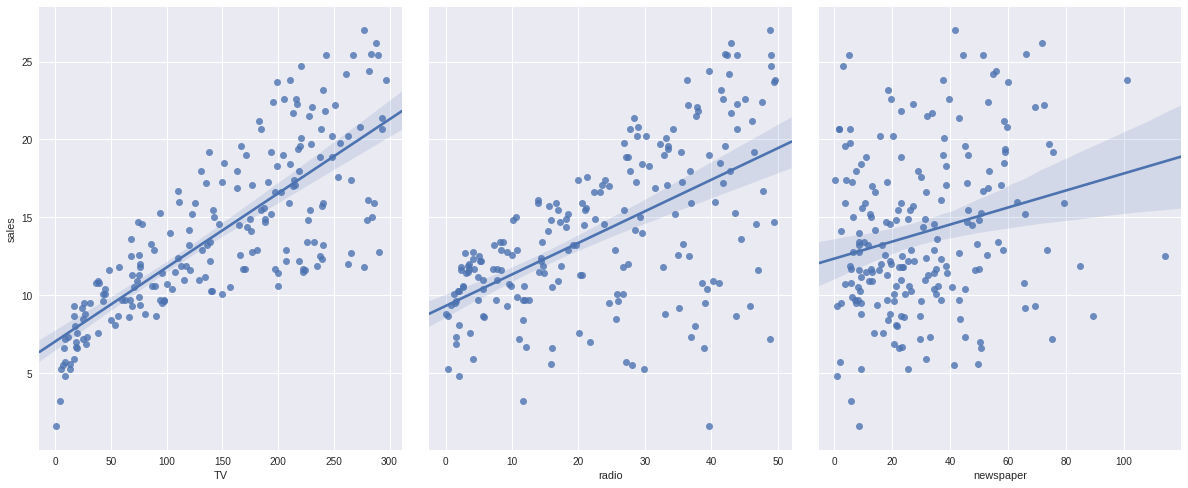

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
#visulize
#add a parameter kind='reg', sns will create a best fitted line and a confidence area of 95%
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.8, kind='reg')
plt.show()

In [12]:
#split traing and test dataset
from sklearn.cross_validation import train_test_split
x=df[['TV', 'radio', 'newspaper']]
y=df['sales']
xTrain, xTest, yTrain, yTest=train_test_split(x, y, random_state=1) #default split 3:1
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [15]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
model=linreg.fit(xTrain, yTrain)
print(model)
print(linreg.intercept_)
print(linreg.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [17]:
yPred=linreg.predict(xTest)
print(yPred)
print(type(yPred))

[ 21.70910292  16.41055243   7.60955058  17.80769552  18.6146359
  23.83573998  16.32488681  13.43225536   9.17173403  17.333853
  14.44479482   9.83511973  17.18797614  16.73086831  15.05529391
  15.61434433  12.42541574  17.17716376  11.08827566  18.00537501
   9.28438889  12.98458458   8.79950614  10.42382499  11.3846456
  14.98082512   9.78853268  19.39643187  18.18099936  17.12807566
  21.54670213  14.69809481  16.24641438  12.32114579  19.92422501
  15.32498602  13.88726522  10.03162255  20.93105915   7.44936831
   3.64695761   7.22020178   5.9962782   18.43381853   8.39408045
  14.08371047  15.02195699  20.35836418  20.57036347  19.60636679]
<class 'numpy.ndarray'>


RMSE:  1.40465142303


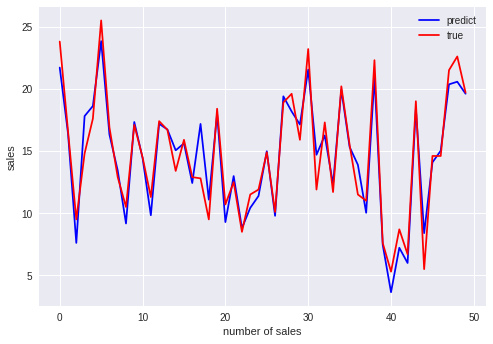

In [33]:
from sklearn import metrics
import numpy as np
sum_error= np.sqrt(np.sum((yPred-yTest.values)**2)/50)
print('RMSE: ', sum_error)
#plot roc

import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(yPred)), yPred, 'b', label='predict')
plt.plot(range(len(yTest)), yTest, 'r', label='true')
plt.legend(loc='upper right')
plt.xlabel('number of sales')
plt.ylabel('sales')
plt.show()

In [34]:
for i ,c in enumerate((100,1,0.01)):
    print (i,c)
    if i<6:
        continue
    else:
        break

0 100
1 1
2 0.01


/program/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


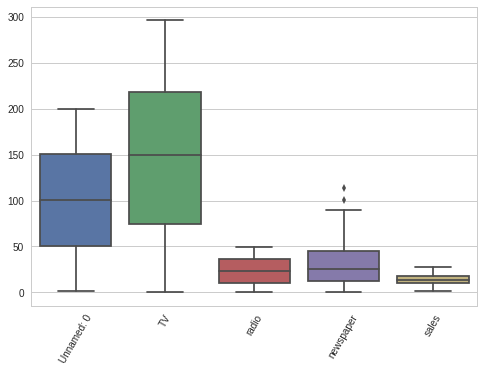

In [40]:
# boxplot/ violinplot to check outliers

sns.set_style('whitegrid')
def box_viz(df):
    ax=sns.boxplot(df)
    plt.xticks(rotation=60)
    plt.show()
box_viz(df)

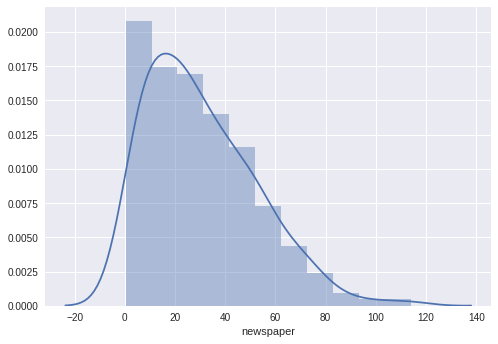

In [38]:
def hist_viz(df, feature):
    ax=sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.show()
    
hist_viz(df, 'newspaper')

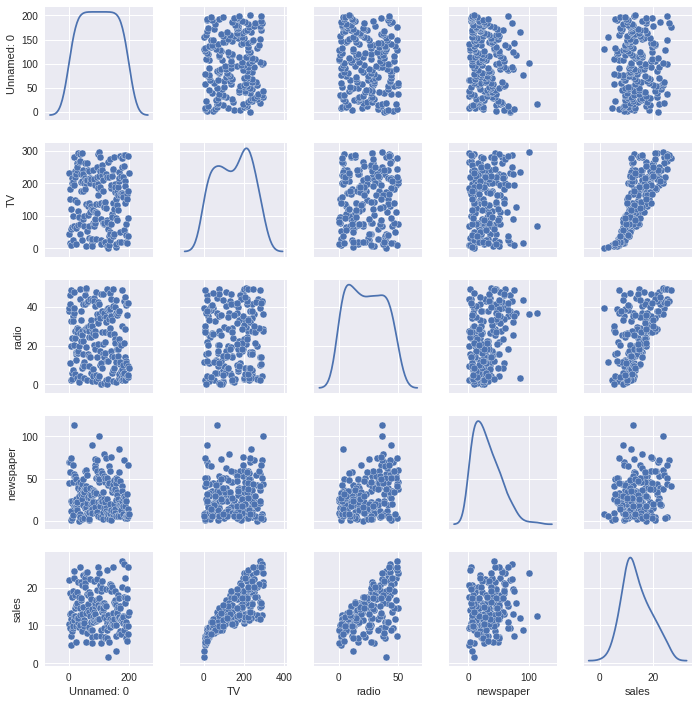

In [39]:
#scatter plot matrice/ splom
def splom_viz(df, labels=None):
    ax=sns.pairplot(df, hue=labels, diag_kind='kde', size=2)
    plt.show()
splom_viz(df)

In [46]:
df.sales.mean()

14.022500000000003

In [51]:
df['saleLabel']=df['sales'].map(lambda x: str(x>14))

In [54]:
type(df.saleLabel[0])

str

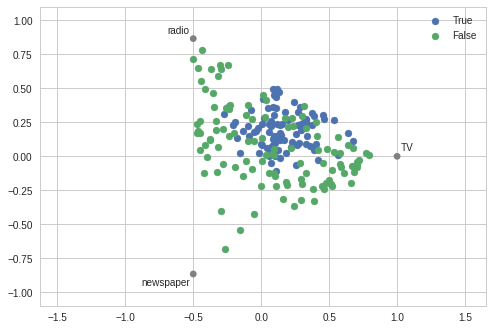

In [59]:
#radviz
from pandas.plotting import radviz

def rad_viz(df, labels):
    fig=radviz(df, labels, color=sns.color_palette())
    fig.legend(loc='cen')
    plt.show()
    
rad_viz(df[['TV','radio','newspaper','saleLabel']], 'saleLabel')
# the feature of newspaper is most far away from the labe of True

In [ ]:
from math import sqrt
def pearson(v1,v2): #v1 and v2 are list of values
    sum1=sum(v1)
    sum2=sum(v2)
    
    sum1sq=sum([pow(v,2) for v in v1])
    sum2sq=sum([pow(v,2) for v in v2])
    
    pSum=sum([v1[i]*v2[i] for i in range(v1)])
    num=pSum - (sum1*sum2/len(v1))
    den=sqrt((sum1sq-pow(sum1,2))/len(v1))*(sum2sq-pow(sum2sq-pow(sum2,2)/len(v1)))
    if den==0:
        return 0
    return 1.0-num/den
    